* Image detection with color
* Threshold
* Canny
* Line Transform (Hough)

## Image processing in OpenCV

In [2]:
import numpy as np
import cv2 

from matplotlib import pyplot as plt

## image detection with color 

In [5]:
# yellow and blue images
import cv2
import numpy as np
cap = cv2.VideoCapture(0)

while(1):
    
    # Take each frame
    _, frame = cap.read()
    
    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    cv2.imshow("hsv",hsv)
    
    # define range of blue color in HSV
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])

    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    
    # Threshold the HSV image to get only yellow colors
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask2 = cv2.inRange(hsv, lower_blue, upper_blue)
    """
    nRange() function returns an array of elements equal to 255 if the elements of the given array lie between 
    the two arrays representing the upper bounds and the lower bounds or the inRange() function returns an array of
    elements equal to 0 if the elements
    of the given array do not lie between the two arrays representing the upper bounds and the lower bounds.
    """
   
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask) # sadece frame ve mask da nonzero olmayanlar
    res2 = cv2.bitwise_and(frame,frame, mask= mask2)
    """
    The operation of "And" will be performed only if mask[i] doesn't equal zero, else the the result of and operation will be zero.
    """
    multiple=cv2.bitwise_or(res,res2)
    
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    cv2.imshow('res2',res2)

    # for multiple color 
    cv2.imshow("multiple",multiple)

    
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()



# Geometric Transformations of Images

Preferable interpolation methods are cv.INTER_AREA for shrinking and cv.INTER_CUBIC (slow) & cv.INTER_LINEAR for zooming. By default, the     interpolation method cv.INTER_LINEAR is used for all resizing purposes.<br>
for more info about transformation , resizing --> https://docs.opencv.org/3.4/da/d6e/tutorial_py_geometric_transformations.html

## Image Thresholding

 the function cv2.threshold is used to apply the thresholding , image must be grayscale <br>
 The method returns two outputs. The first is the threshold that was used and the second output is the thresholded image.

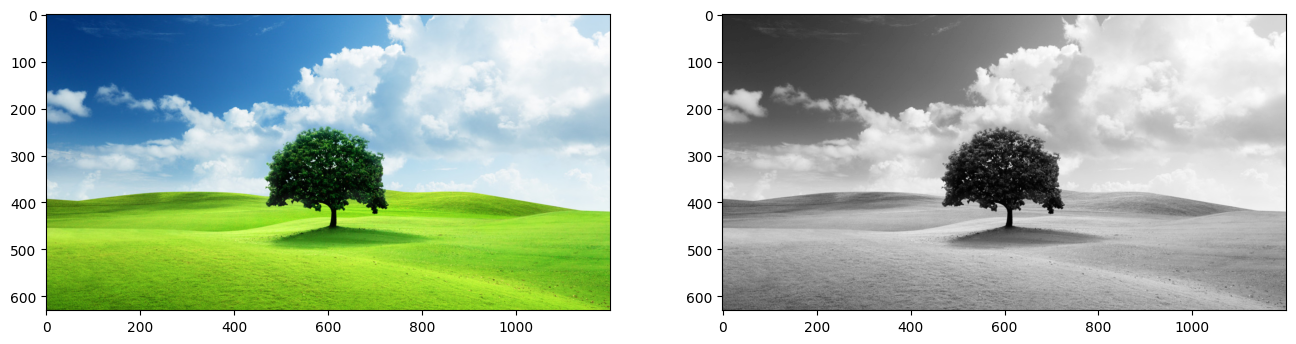

In [10]:
image=cv2.imread("demo_image3.jpg")

image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(16, 8)) 

plt.subplot(121)
plt.imshow(image_rgb)

plt.subplot(122)
plt.imshow(image_gray,cmap="gray")



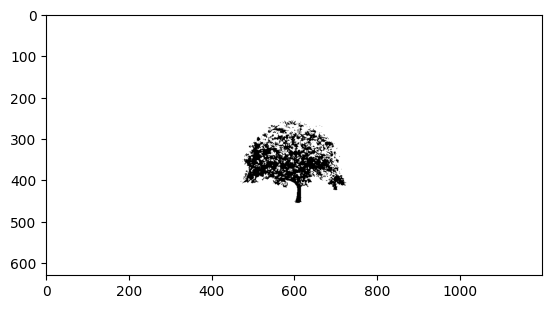

In [31]:
ret,thres_image=cv2.threshold(image_gray,30,255,cv2.THRESH_BINARY)

plt.imshow(thres_image,cmap="gray")

* Adaptive Thresholding <br>
Syntax: cv2.adaptiveThreshold(source, maxVal, adaptiveMethod, thresholdType, blocksize, constant)

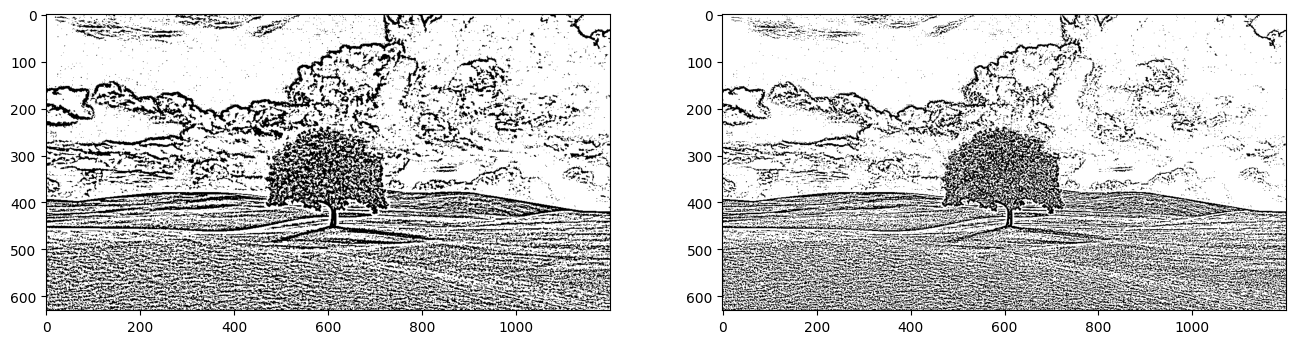

In [39]:
thresh_mean = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

thresh_gaussian = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

plt.figure(figsize=(16, 8)) 

plt.subplot(121)
plt.imshow(thresh_mean,cmap="gray")

plt.subplot(122)
plt.imshow(thresh_gaussian,cmap="gray")


## Smoothing Images

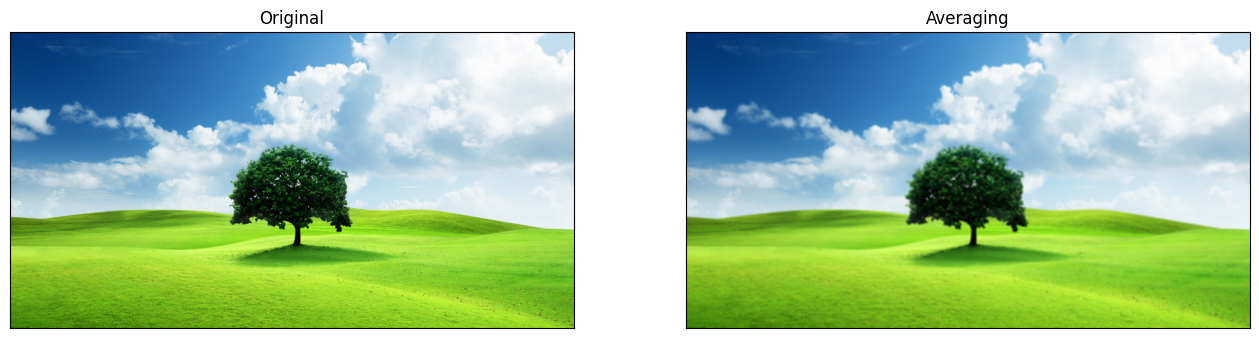

In [45]:
image=cv2.imread("demo_image3.jpg")
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(image_rgb,-1,kernel)

plt.figure(figsize=(16, 8)) 

plt.subplot(121),plt.imshow(image_rgb),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])

plt.show()

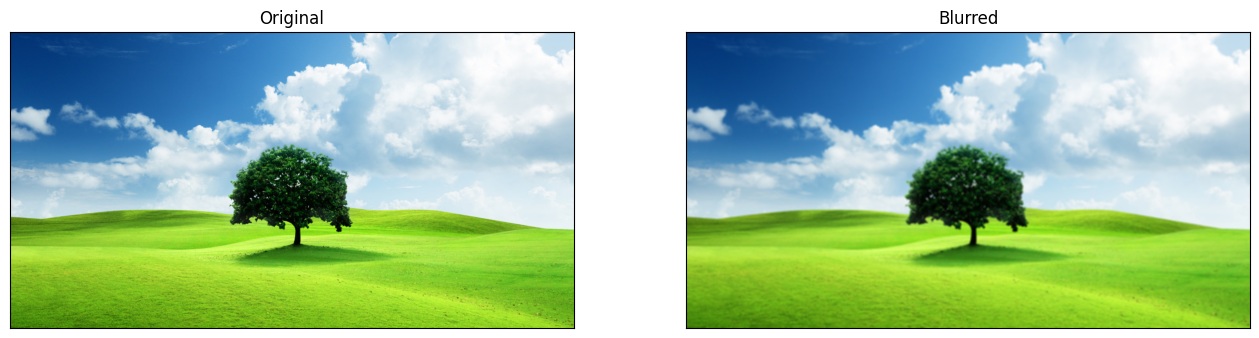

In [47]:
image=cv2.imread("demo_image3.jpg")
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

blur = cv.blur(image_rgb,(5,5))

plt.figure(figsize=(16, 8)) 

plt.subplot(121),plt.imshow(image_rgb),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## Morphological Transformations

for gray images <br>
1. Erosion : the thickness or size of the foreground object decreases or simply white region decreases in the image <br>
2. Dilation :  increases the white region in the image or size of foreground object increases
3. Opening : It is useful in removing noise
4. Closing :  It is useful in closing small holes inside the foreground object

## Canny Edge Detection

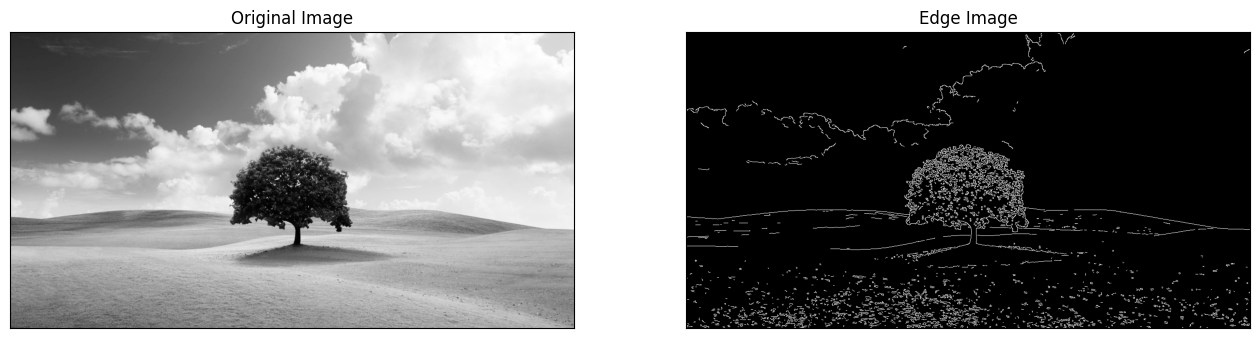

In [59]:
image=cv2.imread("demo_image3.jpg")

image_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

edges = cv.Canny(image_gray,100,150)

plt.figure(figsize=(16, 8)) 

plt.subplot(121),plt.imshow(image_gray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

## Image Pyramids

Normally, we used to work with an image of constant size. But on some occasions, we need to work with (the same) images in different resolution. For example, while searching for something in an image, like face, we are not sure at what size the object will be present in said image. In that case, we will need to create a set of the same image with different resolutions and search for object in all of them. These set of images with different resolutions are called Image Pyramids

In [54]:
image=cv2.imread("demo_image3.jpg")

rgb_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

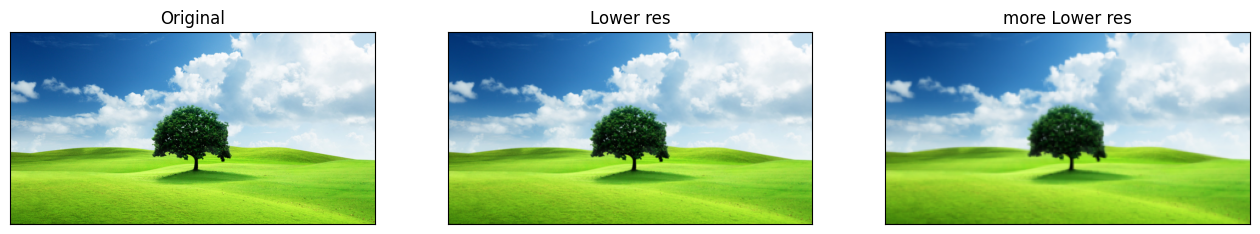

In [58]:
lower_reso = cv2.pyrDown(rgb_image) # cv2.pyrUp(lower_reso) for more resolution
lower_reso2 = cv2.pyrDown(lower_reso)

plt.figure(figsize=(16, 8)) 

plt.subplot(131),plt.imshow(rgb_image),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(lower_reso),plt.title('Lower res')
plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(lower_reso2),plt.title('more Lower res')
plt.xticks([]), plt.yticks([])

plt.show()

## Contours 

for contours check contour notebook , it contains all information about contours in openCV

## Histograms

histogram is a plot with pixel values in X-axis and corresponding number of pixels in the image on Y-axis.

## Template Matching 

Template Matching is a method for searching and finding the location of a template image in a larger image.

## Hough Line Transform

Hough transform is a feature extraction method for detecting simple shapes such as circles, lines etc in an image.<br>A "simple" shape is one that can be represented by only a few parameters. For example, a line can be represented by two parameters (slope, intercept) <br><br>
in openCV , line detection using  Hough Transform is implemented in the function HoughLines and HoughLinesP



In [48]:
image=cv2.imread("images/road.png")
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

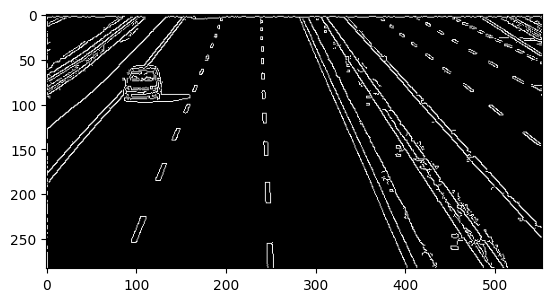

In [52]:
edges = cv2.Canny(image_gray, 50, 200)
plt.imshow(edges,cmap="gray")

In [50]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 75, minLineLength=10, maxLineGap=250)

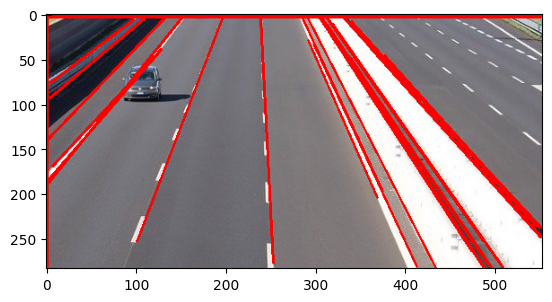

In [51]:
# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)
# Show result
plt.imshow(image_rgb)